In [1]:
from google.colab import drive
drive.mount("/gdrive")

Mounted at /gdrive


In [2]:
!pip install mne

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 8.8 MB/s eta 0:00:00


In [19]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import os
import mne

In [20]:
cd /gdrive/MyDrive/BCSDD

/gdrive/MyDrive/BCSDD


In [21]:
data = sio.loadmat('mat2mne.mat')

In [24]:
eeg_data= data['cnt'].T
srate= data['nfo']['fs'][0][0][0][0]

chan_names= [s[0] for s in data['nfo']['clab'][0][0][0]]
nchannels,nsamples=eeg_data.shape

event_onsets= data['mrk'][0][0][0]
event_codes= data['mrk'][0][0][1]

labels=np.zeros((1,nsamples),dtype=int)
labels[0,event_onsets]=event_codes

cl_lab=[s[0] for s in data['nfo']['classes'][0][0][0]]
cl1=cl_lab[0]
cl2=cl_lab[1]

xpos=data['nfo']['xpos'][0][0]
ypos=data['nfo']['ypos'][0][0]

nclasses=len(cl_lab)
nevents=len(event_onsets)

In [7]:
print(chan_names)

['AF3', 'AF4', 'F5', 'F3', 'F1', 'Fz', 'F2', 'F4', 'F6', 'FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'CFC7', 'CFC5', 'CFC3', 'CFC1', 'CFC2', 'CFC4', 'CFC6', 'CFC8', 'T7', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'T8', 'CCP7', 'CCP5', 'CCP3', 'CCP1', 'CCP2', 'CCP4', 'CCP6', 'CCP8', 'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'PO1', 'PO2', 'O1', 'O2']


In [8]:
#Dictionary to store the trials
trial={}
#time window to extract each trial is .5 to .25 seconds
win=np.arange(int(.5*srate), int(2.5*srate))

#length  of the time window
nsamples=len(win)

#Loop over the classes(right,foot)
for cl, codes in zip(cl_lab, np.unique(event_codes)):

  #Extract the onsets for the class
  cl_onsets = event_onsets[event_codes==codes]

  #Allocate memory for the trials
  trial[cl]=np.zeros((nchannels,nsamples, len(cl_onsets)))

  #Extract each trial
  for i, onset in enumerate(cl_onsets):
    trial[cl][:,:,i]=eeg_data[:,win+onset]


In [9]:
#Rearranging the demensions of trial
left_hand= np.rollaxis(trial[cl1],2,0)
right_hand= np.rollaxis(trial[cl2],2,0)

In [34]:
data2=np.concatenate((left_hand,right_hand),)

In [35]:
print(left_hand)

[[[ 885.  909.  918. ...  916.  922.  939.]
  [ 674.  732.  708. ...  636.  638.  610.]
  [1312. 1303. 1334. ... 1207. 1240. 1259.]
  ...
  [1016.  987.  971. ...  688.  764.  770.]
  [1312. 1224. 1188. ...  898.  998. 1090.]
  [ 787.  789.  794. ...  458.  597.  631.]]

 [[ 799.  839.  852. ...  880.  903.  933.]
  [ 279.  352.  415. ...  388.  436.  468.]
  [1153. 1175. 1178. ... 1257. 1279. 1296.]
  ...
  [ 676.  697.  759. ...  701.  739.  821.]
  [ 957.  964. 1061. ... 1086. 1122. 1129.]
  [ 478.  475.  576. ...  539.  588.  652.]]

 [[ 896.  885.  865. ...  940.  960. 1008.]
  [ 359.  355.  359. ...  266.  294.  313.]
  [1288. 1240. 1197. ... 1185. 1191. 1236.]
  ...
  [ 873.  806.  681. ...  694.  629.  573.]
  [1211. 1151. 1032. ... 1061.  947.  850.]
  [ 680.  634.  532. ...  548.  497.  386.]]

 ...

 [[ 689.  647.  649. ...  840.  804.  772.]
  [ 613.  586.  598. ...  735.  749.  717.]
  [1319. 1283. 1292. ... 1508. 1438. 1388.]
  ...
  [ 614.  602.  737. ...  981.  832.  74

In [36]:
#Creating labels
Y= np.concatenate([-np.ones(left_hand.shape[0]),np.ones(right_hand.shape[0])])

In [37]:
n_channels=len(chan_names)

#initializing a mne
info=mne.create_info(
    ch_names=chan_names,
    sfreq=srate,
    ch_types=['eeg']*n_channels
)
print(info)

<Info | 7 non-empty values
 bads: []
 ch_names: AF3, AF4, F5, F3, F1, Fz, F2, F4, F6, FC5, FC3, FC1, FCz, FC2, ...
 chs: 59 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 50.0 Hz
 meas_date: unspecified
 nchan: 59
 projs: []
 sfreq: 100.0 Hz
>


In [38]:
layout_pos=np.concatenate([xpos,ypos],axis=1)
layout_pos

array([[-0.20109028,  0.68656518],
       [ 0.20109028,  0.68656518],
       [-0.48547489,  0.52547424],
       [-0.32894737,  0.46520183],
       [-0.16535231,  0.43208641],
       [ 0.        ,  0.421549  ],
       [ 0.16535231,  0.43208641],
       [ 0.32894737,  0.46520183],
       [ 0.48547489,  0.52547424],
       [-0.60591541,  0.27165704],
       [-0.39919579,  0.23384348],
       [-0.19765935,  0.21394494],
       [ 0.        ,  0.20773757],
       [ 0.19765935,  0.21394494],
       [ 0.39919579,  0.23384348],
       [ 0.60591541,  0.27165704],
       [-0.74834683,  0.15177169],
       [-0.52472976,  0.12553103],
       [-0.30963911,  0.11086096],
       [-0.10226303,  0.10426648],
       [ 0.10226303,  0.10426648],
       [ 0.30963911,  0.11086096],
       [ 0.52472976,  0.12553103],
       [ 0.74834683,  0.15177169],
       [-0.87719298,  0.        ],
       [-0.64569058,  0.        ],
       [-0.421549  ,  0.        ],
       [-0.20773757,  0.        ],
       [ 0.        ,

In [39]:
mne.channels.generate_2d_layout?

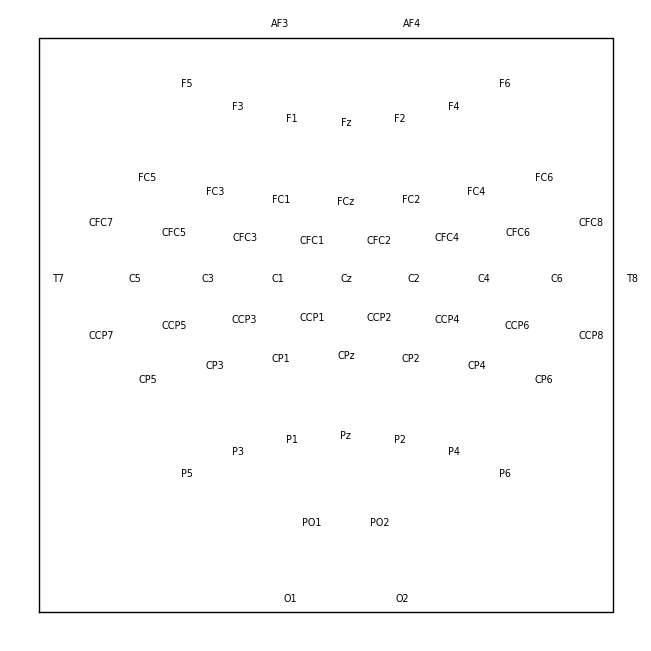

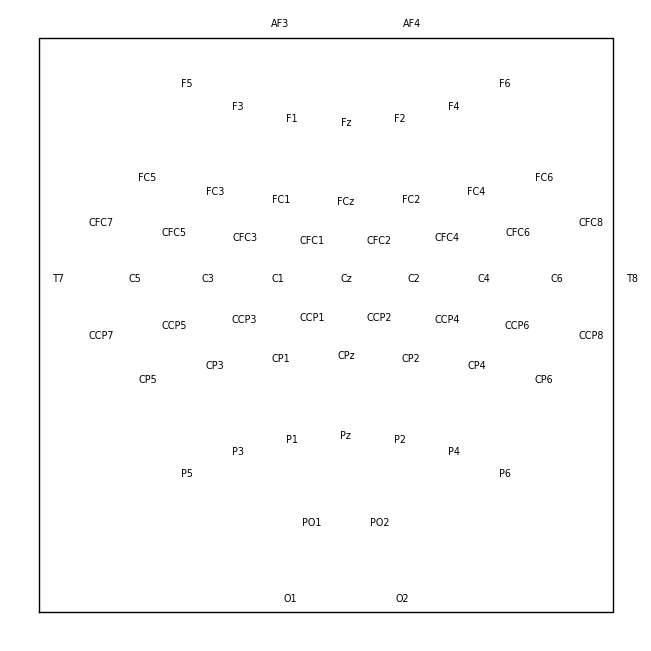

In [40]:
layout=mne.channels.generate_2d_layout(
    xy=layout_pos,
    ch_names=chan_names,
    ch_indices = np.arange(n_channels),
    name='EEG custom layout',
)
layout.plot()

In [41]:
event_id=dict(left=-1, right=1)
#Create an event matrix:events with alternate event codes
eventlength=Y.shape[0]
ev= [i*srate*3 for i in range(eventlength)]
events=np.column_stack((np.array(ev), np.zeros(eventlength, dtype=int),np.array(Y, dtype=int)))


In [46]:
%matplotlib inline
events

array([[    0,     0,    -1],
       [  300,     0,    -1],
       [  600,     0,    -1],
       [  900,     0,    -1],
       [ 1200,     0,    -1],
       [ 1500,     0,    -1],
       [ 1800,     0,    -1],
       [ 2100,     0,    -1],
       [ 2400,     0,    -1],
       [ 2700,     0,    -1],
       [ 3000,     0,    -1],
       [ 3300,     0,    -1],
       [ 3600,     0,    -1],
       [ 3900,     0,    -1],
       [ 4200,     0,    -1],
       [ 4500,     0,    -1],
       [ 4800,     0,    -1],
       [ 5100,     0,    -1],
       [ 5400,     0,    -1],
       [ 5700,     0,    -1],
       [ 6000,     0,    -1],
       [ 6300,     0,    -1],
       [ 6600,     0,    -1],
       [ 6900,     0,    -1],
       [ 7200,     0,    -1],
       [ 7500,     0,    -1],
       [ 7800,     0,    -1],
       [ 8100,     0,    -1],
       [ 8400,     0,    -1],
       [ 8700,     0,    -1],
       [ 9000,     0,    -1],
       [ 9300,     0,    -1],
       [ 9600,     0,    -1],
       [ 9

In [44]:
tmin=.5
epochs=mne.EpochsArray(data2, info, events, tmin, event_id)

Not setting metadata
200 matching events found
No baseline correction applied
0 projection items activated


In [49]:
epochs

Number of events,200
Events,left: 100right: 100
Time range,0.500 – 2.490 s
Baseline,off


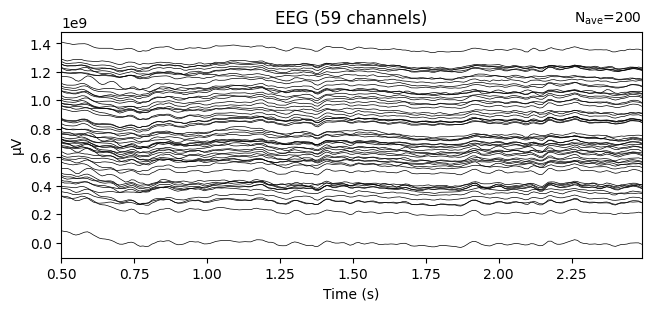

In [48]:
epochs.average().plot();

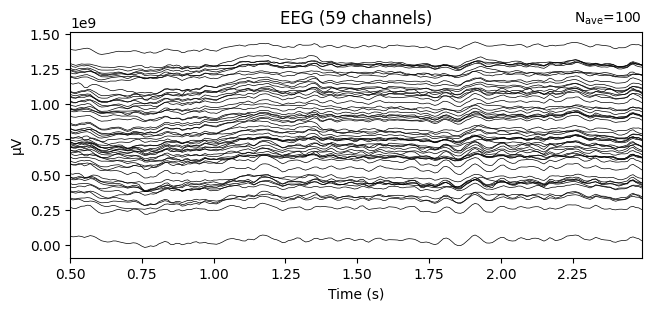

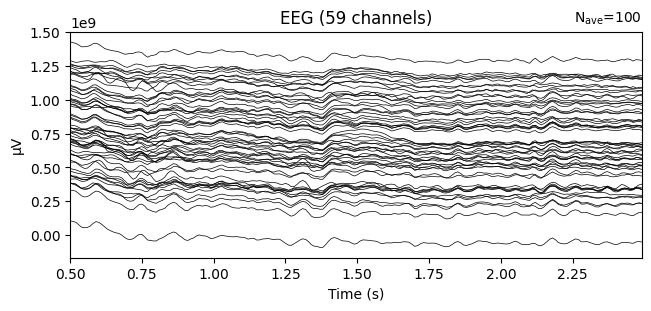

In [50]:
epochs["left"].average().plot();
epochs["right"].average().plot();

Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activated


<ipython-input-53-5aae28c1b283>:1: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs["left"].plot_image(picks=[13]);


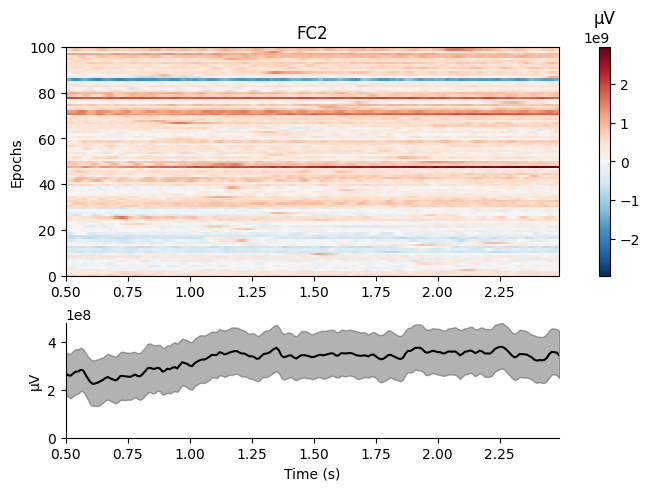

In [53]:
epochs["left"].plot_image(picks=[13]);

In [54]:
left = epochs["left"].average()
right = epochs["right"].average()

In [55]:
left

Condition,left
Data kind,average
Timepoints,200 samples
Channels,59 channels
Number of averaged epochs,100
Time range (secs),0.5 – 2.49
Baseline (secs),off


In [56]:
right

Condition,right
Data kind,average
Timepoints,200 samples
Channels,59 channels
Number of averaged epochs,100
Time range (secs),0.5 – 2.49
Baseline (secs),off


In [58]:
left.plot_topomap();

RuntimeError: No digitization points found.

In [59]:
epochs.info

Measurement date,Unknown
Experimenter,Unknown
Participant,Unknown
Digitized points,Not available
Good channels,59 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,100.00 Hz
Highpass,0.00 Hz
Lowpass,50.00 Hz


In [61]:
ica = mne.preprocessing.ICA(random_state=0)
ica.fit(epochs)

Fitting ICA to data using 59 channels (please be patient, this may take a while)


<ipython-input-61-bd3677b257fe>:2: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(epochs)


Selecting by non-zero PCA components: 59 components
Fitting ICA took 27.4s.


Method,fastica
Fit parameters,algorithm=parallelfun=logcoshfun_args=Nonemax_iter=1000
Fit,96 iterations on epochs (40000 samples)
ICA components,59
Available PCA components,59
Channel types,eeg
ICA components marked for exclusion,—


In [62]:
ica.plot_components(outlines="head");

RuntimeError: No digitization points found.

In [64]:
epochs.info["dig"] = layout

RuntimeError: dig cannot be set directly. Please use method inst.set_montage() instead.

In [69]:
dig_montage = mne.channels.make_dig_montage()
epochs.set_montage(dig_montage)

<ipython-input-69-8897f8b107c4>:2: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  epochs.set_montage(dig_montage)


ValueError: DigMontage is only a subset of info. There are 59 channel positions not present in the DigMontage. The channels missing from the montage are:

['AF3', 'AF4', 'F5', 'F3', 'F1', 'Fz', 'F2', 'F4', 'F6', 'FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'CFC7', 'CFC5', 'CFC3', 'CFC1', 'CFC2', 'CFC4', 'CFC6', 'CFC8', 'T7', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'T8', 'CCP7', 'CCP5', 'CCP3', 'CCP1', 'CCP2', 'CCP4', 'CCP6', 'CCP8', 'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'PO1', 'PO2', 'O1', 'O2'].

Consider using inst.rename_channels to match the montage nomenclature, or inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.

In [70]:
mne.channels.make_dig_montage?